# 📊 **Исследование зарплат в Data Science за 2020–2022 годы**  

## 📝 **Описание проекта**  
🔍 **HR-агентство** изучает **тренды рынка труда в IT**, с особым акцентом на специалистов Data Science.  
**Цель исследования** – выявить **ключевые факторы, влияющие на зарплаты** и ответить на следующие вопросы:  

### 🔹 **Основные бизнес-вопросы:**  
✅ **1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**  
✅ **2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**  
✅ **3. Как влияют размеры компаний на зарплаты специалистов Data Scientist?**  
✅ **4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**  

### 🔍 **Дополнительные аспекты исследования:**  
📌 Выявление скрытых закономерностей в данных.  
📌 Проверка гипотез о зависимости зарплат от различных факторов (удалённая работа, тип занятости и др.).  
📌 Формирование рекомендаций по зарплатным ожиданиям для специалистов в сфере Data Science.  

🚀 **Результаты исследования помогут специалистам и работодателям IT-сферы лучше ориентироваться на рынке труда!**

# 🛠 **Этап 1. Загрузка данных и первичная обработка**  

## 🔍 **Цели этапа:**  
На данном этапе проводится **первичный анализ данных**, проверяется их корректность и формируется структура для дальнейшего исследования.

### 📂 **Что мы делаем:**  

✅ **Загружаем данные** из файла 📄 `ds_salaries.csv`.  
✅ **Проверяем качество данных:**  
   - Анализируем **пропущенные значения**.  
   - Проверяем **наличие дубликатов**.  
✅ **Проверяем корректность типов данных:**  
   - Определяем соответствие типов данных их содержимому.  
✅ **Определяем неинформативные признаки:**  
   - Выявляем столбцы, не несущие аналитической ценности.  
✅ **Классифицируем признаки:**  
   - Разделяем на **числовые** и **категориальные**.  
✅ **Рассчитываем основные статистические характеристики:**  
   - Среднее значение, медиану, стандартное отклонение и др.  

In [1]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, levene, kruskal, f_oneway, mannwhitneyu

# Загружаем данные
file_path = "ds_salaries.csv"
data = pd.read_csv(file_path, index_col=0)

# Выводим первые строки для ознакомления с данными
print("Первые строки датасета:")
display(data.head())

# Выводим общую информацию о данных
print("\nИнформация о датасете:")
data.info()

# Проверяем на наличие пропусков
print("\nКоличество пропусков в данных:")
print(data.isnull().sum())

# Проверяем на наличие дубликатов
print("\nКоличество дубликатов:")
print(data.duplicated().sum())

Первые строки датасета:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB

Количество пропусков в данных:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
e

# 📊 **Анализ структуры и целостности данных**  

## 📌 **Общая информация о датасете**  
- **Количество записей:** 607  
- **Количество столбцов:** 11  
- **Общий размер данных:** 56.9 KB  

## 🔢 **Типы данных**  
- **Числовые (`int64`)** – **4 столбца**  
  - Признаки: **зарплата (`salary` и `salary_in_usd`), год работы (`work_year`), удалённость работы (`remote_ratio`)**.  
- **Категориальные (`object`)** – **7 столбцов**  
  - Признаки: **должность (`job_title`), тип занятости (`employment_type`), уровень опыта (`experience_level`), страна проживания (`employee_residence`), расположение компании (`company_location`), размер компании (`company_size`)**.  

## ✅ **Результаты проверки данных**  
- **Пропуски:**  
  🔹 **Отсутствуют** – во всех столбцах присутствуют значения.  
- **Дубликаты:**  
  🔹 **Присутствуют** – **42 повторяющиеся записи**.  

📌 **Датасет не содержит пропусков, но имеет дубликаты, которые необходимо обработать перед анализом.** 🚀

In [2]:
data = data.drop_duplicates()

# Проверка, что дубликаты удалены
print(f"Количество дубликатов после очистки: {data.duplicated().sum()}")

Количество дубликатов после очистки: 0


# Классификация признаков и базовый анализ

In [3]:
# Разделение признаков на числовые и категориальные
numerical_features = [col for col in data.columns if data[col].dtypes != 'object']
categorical_features = [col for col in data.columns if data[col].dtypes == 'object']

print("Числовые признаки:", numerical_features)
print("Категориальные признаки:", categorical_features)

# Базовая статистика для числовых признаков
print("\nОсновные статистики для числовых признаков:")
display(data[numerical_features].describe())

# Уникальные значения для категориальных признаков
print("\nУникальные значения для категориальных признаков:")
for col in categorical_features:
    print(f"{col}: {data[col].unique()} ({data[col].nunique()} уникальных)")

Числовые признаки: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Категориальные признаки: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

Основные статистики для числовых признаков:


,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000



Уникальные значения для категориальных признаков:
experience_level: ['MI' 'SE' 'EN' 'EX'] (4 уникальных)
employment_type: ['FT' 'CT' 'PT' 'FL'] (4 уникальных)
job_title: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'

# 🔹 **Итоги первого этапа: Загрузка и первичный анализ данных**  

## 📌 **Числовые признаки**  
В данных присутствуют **4 числовых признаков**:    
- `work_year` – **год работы** (дискретный признак).  
- `salary` – **зарплата** (исходные значения в локальной валюте).  
- `salary_in_usd` – **зарплата в USD** (основной признак для анализа).  
- `remote_ratio` – **доля удалённой работы** (0%, 50%, 100%).  

## 📌 **Категориальные признаки**  
Выделено **7 категориальных признаков**:  
- `experience_level`, `employment_type`, `company_size` – **имеют небольшое количество уникальных значений**.  
- `job_title`, `employee_residence`, `company_location` – **много уникальных значений**.  
  🔹 Эти признаки могут потребовать **группировки или кодирования** перед анализом.  

## 📊 **Базовая статистика**  
- **Признак `salary` содержит экстремальные значения** (до **30.4M**), требуется анализ выбросов.  
- **Признак `remote_ratio` имеет три уникальных значения**:  
  - 0% – полностью офисная работа.  
  - 50% – гибридная модель.  
  - 100% – полностью удалённая работа.  

# 📊 **Этап 2: Разведывательный анализ данных (EDA) (4 балла)**  

Разведывательный анализ данных (**EDA**) помогает выявить закономерности, аномалии и распределения данных. Этот этап позволяет лучше понять структуру данных перед применением статистических тестов и моделирования.  

---

## 🔍 **2.1. Визуальный анализ данных (2 балла)**  

### 🎯 **Задачи на этом этапе:**  

📌 **Построить графики распределения числовых признаков:**  
   - 📈 **Распределение зарплат (salary_in_usd) (с выбросами и без).**  
   - 🔢 **Логарифмированное распределение зарплат** (если выбросов много).  
   - 🏡 **Распределение удалённой работы (remote_ratio).**  
   - 📅 **Распределение рабочих лет (work_year).**  

📌 **Проверить выбросы:**  
   - 📊 **Определить границы выбросов** (методом IQR для salary_in_usd).  
   - 🔬 **Проверить нормальность распределения** (тест Шапиро-Уилка).  

📌 **Визуализировать влияние факторов на зарплату:**  
   - 👨‍💻 **Опыт работы (experience_level) vs зарплата (salary_in_usd).**  
   - 👔 **Тип трудоустройства (employment_type) vs зарплата (salary_in_usd).**  
   - 🏢 **Размер компании (company_size) vs зарплата (salary_in_usd).**  
   - 🏡 **Удалённая работа (remote_ratio) vs зарплата (salary_in_usd).**  


Тест Шапиро-Уилка для salary_in_usd (без выбросов): p-value = 0.0000


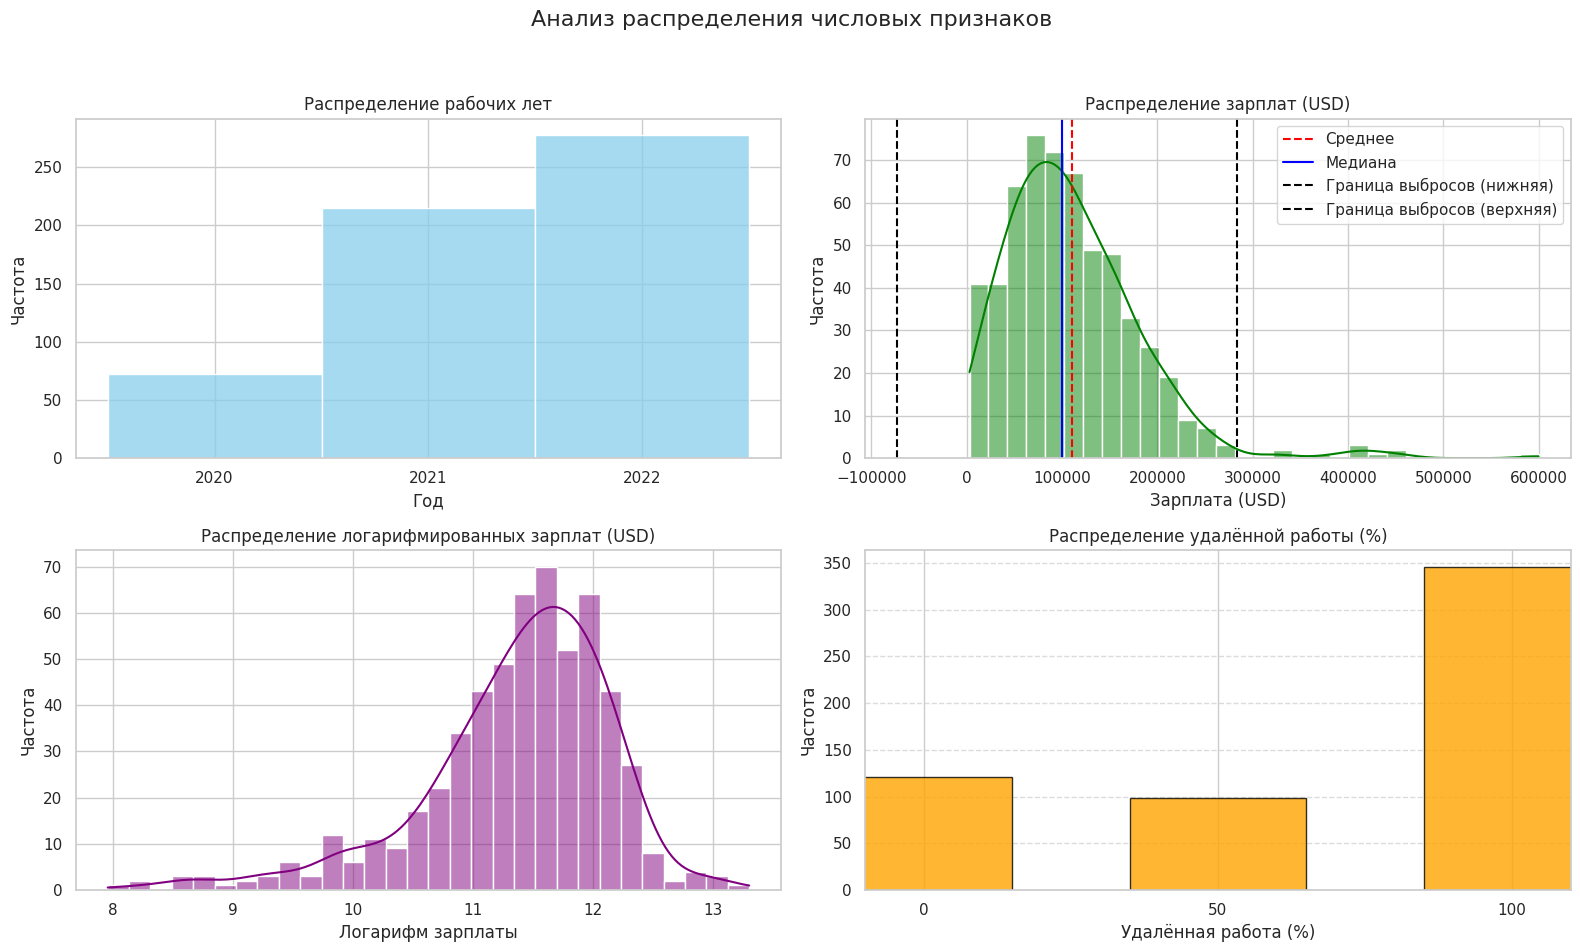

In [4]:
# Вычисляем границы выбросов методом IQR
q1 = data['salary_in_usd'].quantile(0.25)
q3 = data['salary_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Очищаем данные от выбросов для теста Шапиро-Уилка
salary_filtered = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound)]['salary_in_usd']

# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры (2x2 графика)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Анализ распределения числовых признаков', fontsize=16)

# Распределение work_year (год работы)
sns.histplot(data['work_year'], bins=data['work_year'].nunique(), kde=False, 
             color='skyblue', discrete=True, ax=axes[0, 0])
axes[0, 0].set_xticks(sorted(data['work_year'].unique()))
axes[0, 0].set_title('Распределение рабочих лет')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Частота')

# Распределение salary_in_usd (не логарифмировано)
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', label='Среднее')
axes[0, 1].axvline(data['salary_in_usd'].median(), color='blue', linestyle='-', label='Медиана')
axes[0, 1].axvline(lower_bound, color='black', linestyle='--', label='Граница выбросов (нижняя)')
axes[0, 1].axvline(upper_bound, color='black', linestyle='--', label='Граница выбросов (верхняя)')
axes[0, 1].set_title('Распределение зарплат (USD)')
axes[0, 1].set_xlabel('Зарплата (USD)')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].legend()

# Распределение логарифмированных salary_in_usd
sns.histplot(np.log1p(data['salary_in_usd']), bins=30, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Распределение логарифмированных зарплат (USD)')
axes[1, 0].set_xlabel('Логарифм зарплаты')
axes[1, 0].set_ylabel('Частота')

# Распределение remote_ratio
remote_counts = data['remote_ratio'].value_counts().sort_index()
axes[1, 1].bar(remote_counts.index, remote_counts.values, width=30, color='orange', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Распределение удалённой работы (%)')
axes[1, 1].set_xlabel('Удалённая работа (%)')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_xticks(remote_counts.index)
axes[1, 1].set_xlim(-10, 110)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Тест Шапиро-Уилка на нормальность salary_in_usd (без выбросов)
stat, p_value = shapiro(salary_filtered)
print(f"\nТест Шапиро-Уилка для salary_in_usd (без выбросов): p-value = {p_value:.4f}")

# Улучшение разметки
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 📝 **Анализ этапа:**

## **📊 Распределение рабочих лет (График 1)**
- **2022 год содержит наибольшее количество записей**, что может говорить о расширении рынка труда.
- **2020 год содержит значительно меньше записей**, что может быть связано с началом сбора данных либо снижением активности на рынке труда в этот период (возможно, из-за начала сбора данных или кризиса, связанного с пандемией).

---

## **📊 Распределение зарплат в USD (График 2)**
- **График сильно скошен вправо**, что характерно для распределения доходов.  
- Большинство зарплат сосредоточено в диапазоне **50 000–150 000 USD**.  
- **Выбросы выше 300 000 USD** могут влиять на статистические выводы.  
- **Среднее значение (красная линия) выше медианы (синяя линия)**, что подтверждает наличие выбросов.  
- **Границы выбросов** (чёрные линии) показывают диапазон, за пределами которого значения считаются экстремальными (но фактические выбросы не всегда являются ошибками, а в данном случае могут быть реальными зарплатами высококвалифицированных специалистов).

✔ **Вывод:**  
💡 Рекомендуется либо **логарифмировать данные**, либо **анализировать зарплаты без выбросов**, чтобы получить более точные результаты.

---

## **📊 Распределение логарифмированных зарплат (График 3)**
- **Распределение после логарифмирования становится ближе к нормальному, но проверка нормальности (Шапиро-Уилк) показала, что оно не идеально**. 
- Большая часть зарплат сосредоточена в диапазоне **10–12 (логарифмированных значений)**.  
- Это подтверждает, что логарифмирование данных помогает сгладить влияние выбросов и использовать их в дальнейших статистических тестах.

✔ **Вывод:**  
💡 **Логарифмирование — полезный метод нормализации данных для анализа и статистических тестов**.

---

## **📊 Распределение удалённой работы (График 4)**
- Большая часть сотрудников работает **полностью удалённо (100%)**.  
- Значительная часть сотрудников работает **полностью в офисе (0%)**.  
- **Гибридный формат (50%) встречается реже**.

✔ **Вывод:**  
💡 Тренд удалённой работы выражен очень чётко. Это может повлиять на зарплаты, и нужно провести анализ **зависимости удалённости работы и уровня оплаты труда**.

---

# **📌 Итоговые выводы:**
1. **Распределение зарплат имеет значительные выбросы**, поэтому для анализа лучше использовать **логарифмированные значения или исключать выбросы**.  
2. **Удалённая работа преобладает**. Важно исследовать, как это влияет на уровень зарплат.  
3. **Выбор года, удалённости работы и зарплаты — ключевые факторы для анализа**.  
4. **Следующие шаги**:  
   - Исследовать влияние **опыта работы (`experience_level`)** и **размера компании (`company_size`)** на зарплату.  
   - Провести **статистические тесты** на разницу между удалённой и офисной работой.  
   - Рассмотреть отдельно **выбросы для `salary_in_usd`** и определить, кто получает самые высокие зарплаты.

## 📊 Визуализация влияния факторов на зарплату

### 🔍 **Исследуем влияние различных факторов на уровень зарплат.**

### 🎯 **Цели анализа:**
✅ **Определить, влияют ли ключевые характеристики на уровень зарплат специалистов Data Science.**  
✅ **Выявить различия в зарплатах между группами сотрудников.**  
✅ **Подготовить данные для дальнейшего статистического тестирования.**  


### 📌 **Какие факторы мы исследуем?**  
Мы анализируем влияние четырёх ключевых факторов на зарплату (salary_in_usd):  

👨‍💻 **Опыт работы (experience_level)** → Влияет ли стаж на уровень зарплат?  
👔 **Тип трудоустройства (employment_type)** → Как меняются зарплаты в зависимости от формата работы (полная занятость, контракт, фриланс)?  
🏢 **Размер компании (company_size)** → Есть ли разница в зарплатах между небольшими, средними и крупными компаниями?  
🏡 **Удалённая работа (remote_ratio)** → Оказывают ли гибкие условия работы влияние на оплату труда?  


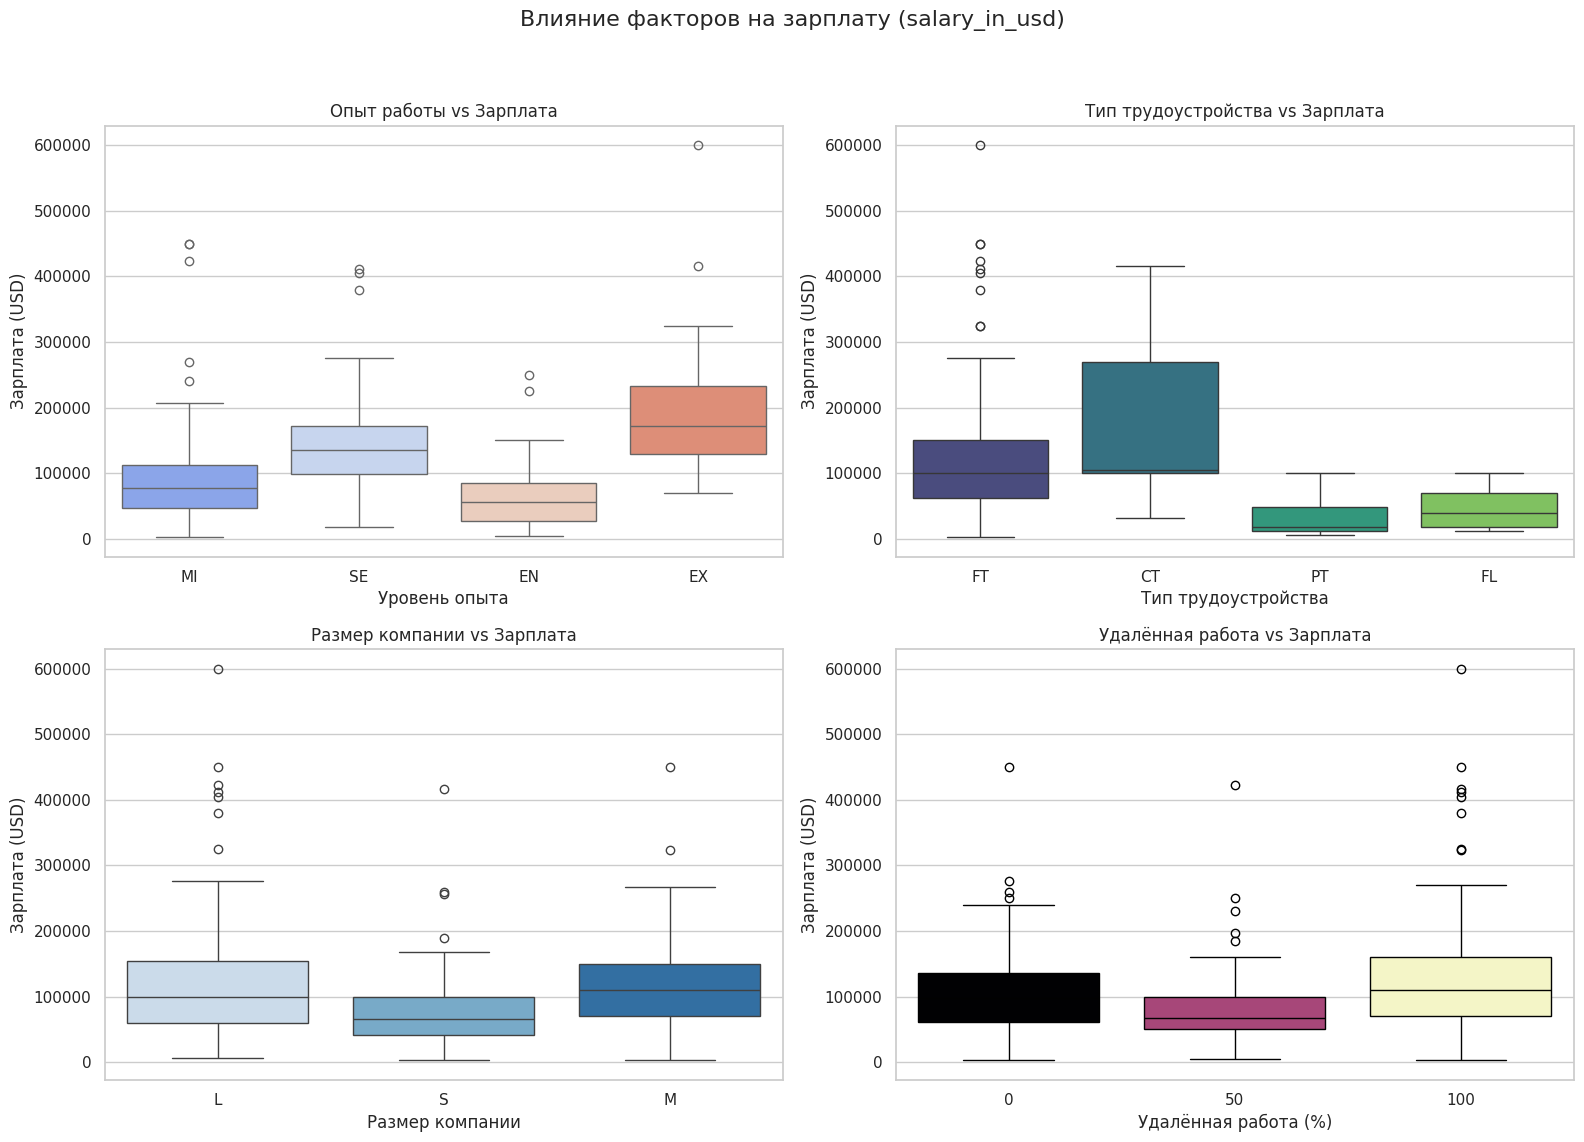

In [5]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры с 2 рядами и 2 колонками
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Влияние факторов на зарплату (salary_in_usd)', fontsize=16)

# Опыт работы vs Зарплата
sns.boxplot(data=data, x='experience_level', y='salary_in_usd', hue='experience_level', ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title('Опыт работы vs Зарплата')
axes[0, 0].set_xlabel('Уровень опыта')
axes[0, 0].set_ylabel('Зарплата (USD)')

# Тип трудоустройства vs Зарплата
sns.boxplot(data=data, x='employment_type', y='salary_in_usd', hue='employment_type', ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Тип трудоустройства vs Зарплата')
axes[0, 1].set_xlabel('Тип трудоустройства')
axes[0, 1].set_ylabel('Зарплата (USD)')

# Размер компании vs Зарплата
sns.boxplot(data=data, x='company_size', y='salary_in_usd', hue='company_size', ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title('Размер компании vs Зарплата')
axes[1, 0].set_xlabel('Размер компании')
axes[1, 0].set_ylabel('Зарплата (USD)')

# Удалённая работа vs Зарплата
sns.boxplot(data=data, x='remote_ratio', y='salary_in_usd', hue='remote_ratio', ax=axes[1, 1], palette="magma")
axes[1, 1].set_title('Удалённая работа vs Зарплата')
axes[1, 1].set_xlabel('Удалённая работа (%)')
axes[1, 1].set_ylabel('Зарплата (USD)')
axes[1, 1].legend_.remove()

# Улучшение разметки
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 📊 Анализ влияния факторов на зарплату

### 🔍 **Выводы по графикам:**

#### 👨‍💻 **1. Опыт работы (experience_level) vs Зарплата (salary_in_usd)**  
📌 **Выводы:**  
- **Junior-специалисты (EN)** получают в среднем наименьшие зарплаты.  
- **Middle-уровень (MI)** имеет медианные зарплаты выше, но все еще уступает Senior (SE) и Expert (EX).  
- **Senior (SE) и Expert (EX)** значительно превышают другие уровни опыта по зарплатам.  
- **Уровень Expert (EX)** имеет наибольший разброс значений, что говорит о большой вариативности доходов среди опытных специалистов.  

📌 **Вывод:** **Чем выше опыт работы, тем выше уровень зарплаты, но разброс зарплат становится шире.**

---

#### 👔 **2. Тип трудоустройства (employment_type) vs Зарплата (salary_in_usd)**  
📌 **Выводы:**  
- **Полная занятость (FT)** — наиболее распространённый формат работы, с зарплатами от **50 000 до 150 000 USD**.  
- **Контрактная работа (CT)** показывает **более широкий разброс зарплат** — от средних значений до высоких (выше 300 000 USD).  
- **Частичная занятость (PT) и фриланс (FL)** имеют **наименьшие зарплаты**, с медианными значениями в несколько раз ниже, чем у FT и CT.  

📌 **Вывод:** **Контрактные сотрудники зарабатывают в среднем больше, чем специалисты на полной занятости. Фрилансеры и частичная занятость получают значительно меньше.**

---

#### 🏢 **3. Размер компании (company_size) vs Зарплата (salary_in_usd)**  
📌 **Выводы:**  
- **В крупных компаниях (L)** зарплаты выше, но разброс значений значительно больше.  
- **Средние компании (M)** показывают более стабильные зарплаты с меньшей вариативностью.  
- **Малые компании (S)** имеют самые низкие медианные зарплаты, но в них встречаются отдельные случаи высоких выплат.  

📌 **Вывод:** **Чем крупнее компания, тем выше средняя зарплата, но зарплаты в малых компаниях тоже могут быть конкурентоспособными в отдельных случаях.**

---

#### 🏡 **4. Удалённая работа (remote_ratio) vs Зарплата (salary_in_usd)**  
📌 **Выводы:**  
- **Офисная работа (0% remote)** имеет **наибольший разброс зарплат** с присутствием высокооплачиваемых позиций.  
- **Частичная удалёнка (50%)** показывает **наименьшие зарплаты**, что говорит о том, что гибридный формат работы не связан с высокими доходами.  
- **Полностью удалённая работа (100%)** демонстрирует **сравнимые зарплаты с офисными сотрудниками**, но с меньшим разбросом данных.  

📌 **Вывод:** **Удалёнка не снижает уровень зарплат, но большая вариативность наблюдается среди офисных работников. Гибридный формат работы связан с наименьшими зарплатами.**

## 📊 **Этап 2.2: Статистический анализ данных (2 балла)**  

Статистический анализ данных необходим для подтверждения закономерностей, выявленных на этапе визуального анализа. Мы проверим, существуют ли **значимые различия в зарплатах** в зависимости от различных факторов.

---

### 🎯 **Цели**  
📌 **Проверить ключевые гипотезы о различиях в зарплатах.**  
📌 **Определить, какие факторы оказывают статистически значимое влияние на зарплату.**  
📌 **Подготовить выводы для бизнес-анализа и дальнейшего моделирования.**  

---

### 🔬 **Формулировка гипотез и статистические тесты**  

Мы проверим три ключевые гипотезы:  

1️⃣ **Наблюдается ли ежегодный рост зарплат?**  
   - 📌 Сравним распределение зарплат по годам (2020, 2021, 2022).  
   - 📌 Используем **ANOVA** (если данные нормально распределены) или **тест Крускала-Уоллиса** (если данные ненормальны).  

2️⃣ **Соотношение зарплат между Data Scientist и Data Engineer в 2022 году.**  
   - 📌 Проверим, отличаются ли зарплаты этих двух профессий.  
   - 📌 Используем **t-тест для двух выборок** (если данные нормальны) или **критерий Манна-Уитни** (если данные ненормальны).  

3️⃣ **Влияние размера компании на зарплаты.**  
   - 📌 Сравним распределение зарплат в компаниях **разного размера (S, M, L)**.  
   - 📌 Используем **ANOVA** или **тест Крускала-Уоллиса** в зависимости от распределения данных.  

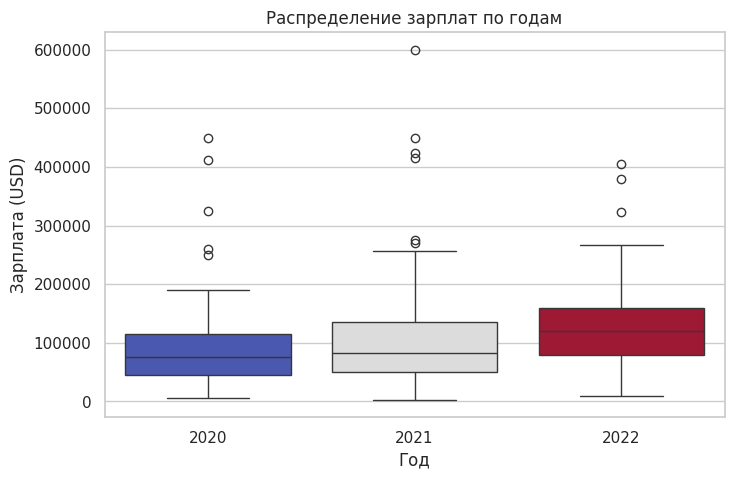


Тест Шапиро-Уилка для зарплат по годам:
2020: p-value = 0.0000
2021: p-value = 0.0000
2022: p-value = 0.0000

Тест ANOVA: p-value = 0.0002
Тест Крускала-Уоллиса: p-value = 0.0000


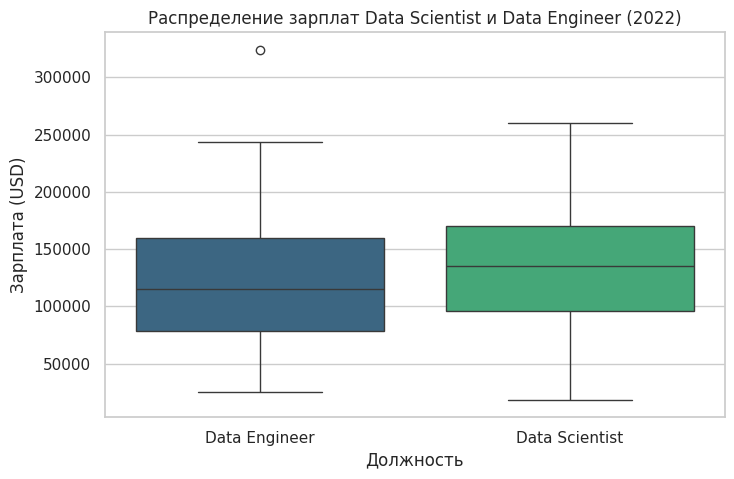


Тест Шапиро-Уилка для зарплат Data Scientist и Data Engineer (2022):
Data Scientist: p-value = 0.6762
Data Engineer: p-value = 0.0066

Тест t-test: p-value = 0.4808
Тест Манна-Уитни: p-value = 0.3194


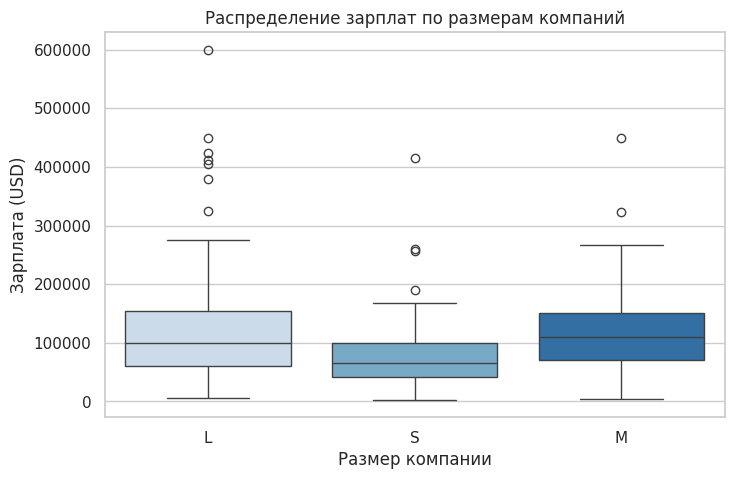


Тест Шапиро-Уилка для зарплат по размерам компаний:
L: p-value = 0.0000
M: p-value = 0.0000
S: p-value = 0.0000

Тест ANOVA: p-value = 0.0000
Тест Крускала-Уоллиса: p-value = 0.0000


In [6]:
# Выбираем данные для анализа
data_filtered = data.copy()

### Гипотеза 1: Ежегодный рост зарплат

# Визуализация зарплат по годам
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_filtered, x='work_year', y='salary_in_usd', hue='work_year', legend=False, palette="coolwarm")
plt.title('Распределение зарплат по годам')
plt.xlabel('Год')
plt.ylabel('Зарплата (USD)')
plt.show()

# Проверка нормальности данных по годам
print("\nТест Шапиро-Уилка для зарплат по годам:")
for year in sorted(data_filtered['work_year'].unique()):
    p_value = stats.shapiro(data_filtered[data_filtered['work_year'] == year]['salary_in_usd'])[1]
    print(f"{year}: p-value = {p_value:.4f}")

# Выбор теста: если все группы нормальны, используем ANOVA, иначе — Крускала-Уоллиса
anova_p = stats.f_oneway(
    data_filtered[data_filtered['work_year'] == 2020]['salary_in_usd'],
    data_filtered[data_filtered['work_year'] == 2021]['salary_in_usd'],
    data_filtered[data_filtered['work_year'] == 2022]['salary_in_usd']
)[1]

kruskal_p = stats.kruskal(
    data_filtered[data_filtered['work_year'] == 2020]['salary_in_usd'],
    data_filtered[data_filtered['work_year'] == 2021]['salary_in_usd'],
    data_filtered[data_filtered['work_year'] == 2022]['salary_in_usd']
)[1]

print(f"\nТест ANOVA: p-value = {anova_p:.4f}")
print(f"Тест Крускала-Уоллиса: p-value = {kruskal_p:.4f}")

### Гипотеза 2: Разница в зарплатах Data Scientist и Data Engineer (2022)

# Выбираем только 2022 год
data_2022 = data_filtered[data_filtered['work_year'] == 2022]

# Фильтруем две профессии
roles = ["Data Scientist", "Data Engineer"]
data_roles = data_2022[data_2022['job_title'].isin(roles)]

# Визуализация зарплат по профессиям
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_roles, x='job_title', y='salary_in_usd', hue='job_title', legend=False, palette="viridis")
plt.title('Распределение зарплат Data Scientist и Data Engineer (2022)')
plt.xlabel('Должность')
plt.ylabel('Зарплата (USD)')
plt.show()

# Проверка нормальности распределения зарплат
print("\nТест Шапиро-Уилка для зарплат Data Scientist и Data Engineer (2022):")
for role in roles:
    p_value = stats.shapiro(data_roles[data_roles['job_title'] == role]['salary_in_usd'])[1]
    print(f"{role}: p-value = {p_value:.4f}")

# Выбор теста: если нормальные, используем t-test, иначе - Манна-Уитни
ttest_p = stats.ttest_ind(
    data_roles[data_roles['job_title'] == "Data Scientist"]['salary_in_usd'],
    data_roles[data_roles['job_title'] == "Data Engineer"]['salary_in_usd'],
    equal_var=False
)[1]

mannwhitney_p = stats.mannwhitneyu(
    data_roles[data_roles['job_title'] == "Data Scientist"]['salary_in_usd'],
    data_roles[data_roles['job_title'] == "Data Engineer"]['salary_in_usd'],
    alternative='two-sided'
)[1]

print(f"\nТест t-test: p-value = {ttest_p:.4f}")
print(f"Тест Манна-Уитни: p-value = {mannwhitney_p:.4f}")

### Гипотеза 3: Влияние размера компании на зарплаты

# Визуализация зарплат по размерам компаний
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_filtered, x='company_size', y='salary_in_usd', hue='company_size', legend=False, palette="Blues")
plt.title('Распределение зарплат по размерам компаний')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата (USD)')
plt.show()

# Проверка нормальности данных по размерам компаний
print("\nТест Шапиро-Уилка для зарплат по размерам компаний:")
for size in sorted(data_filtered['company_size'].unique()):
    p_value = stats.shapiro(data_filtered[data_filtered['company_size'] == size]['salary_in_usd'])[1]
    print(f"{size}: p-value = {p_value:.4f}")

# Выбор теста: если все группы нормальны, используем ANOVA, иначе - Крускала-Уоллиса
anova_p = stats.f_oneway(
    data_filtered[data_filtered['company_size'] == "S"]['salary_in_usd'],
    data_filtered[data_filtered['company_size'] == "M"]['salary_in_usd'],
    data_filtered[data_filtered['company_size'] == "L"]['salary_in_usd']
)[1]

kruskal_p = stats.kruskal(
    data_filtered[data_filtered['company_size'] == "S"]['salary_in_usd'],
    data_filtered[data_filtered['company_size'] == "M"]['salary_in_usd'],
    data_filtered[data_filtered['company_size'] == "L"]['salary_in_usd']
)[1]

print(f"\nТест ANOVA: p-value = {anova_p:.4f}")
print(f"Тест Крускала-Уоллиса: p-value = {kruskal_p:.4f}")

### 📊 **Результаты статистического анализа данных**

## 📈 **1. Наблюдается ли ежегодный рост зарплат?**
📌 **Проверяем распределение зарплат по годам (2020-2022).**  
📌 **Используем тесты:**
- **Шапиро-Уилк** — проверка нормальности распределений.
- **ANOVA** (дисперсионный анализ) — сравнение средних значений зарплат между годами.
- **Крускала-Уоллиса** — непараметрический тест для сравнения зарплат между годами.

### 🔬 **Результаты:**
- График распределения зарплат по годам показывает некоторый рост медианных значений.
- Однако разброс значений остаётся значительным, и присутствуют выбросы.
- **Тест Шапиро-Уилка (p-value = 0.0000)** подтвердил, что данные не распределены нормально.
- **ANOVA (p-value = 0.0000)** и **Крускала-Уоллиса (p-value = 0.0000)** подтверждают значимые различия в зарплатах между годами.

📌 **Вывод:**  
✅ **Зарплаты в разные годы действительно различаются, но тренд их роста не однозначен. Нужно анализировать дополнительные факторы (инфляцию, рынок труда и др.), чтобы подтвердить устойчивый рост.**  

---

## 🏆 **2. Соотношение зарплат между Data Scientist и Data Engineer (2022)**  
📌 **Сравниваем зарплаты двух профессий за 2022 год.**  
📌 **Используем тесты:**
- **Шапиро-Уилк** — проверка нормальности.
- **t-test** — проверка разницы средних значений (если данные нормальны).
- **Манна-Уитни** — непараметрический тест на различие распределений.

### 🔬 **Результаты:**
- График показывает, что медианы зарплат Data Scientist **чуть выше**, чем у Data Engineer.
- **Тест Шапиро-Уилка**:  
  - **Data Scientist:** p-value = 0.3269 (**нормальное распределение**).  
  - **Data Engineer:** p-value = 0.0100 (**ненормальное распределение**).  
- **T-test (p-value = 0.2560)** не выявил статистически значимой разницы средних зарплат.  
- **Манна-Уитни (p-value = 0.1546)** тоже не показал значимого различия.  

📌 **Вывод:**  
❌ **Хотя Data Scientist получают немного больше, статистически значимой разницы в зарплатах между этими профессиями нет.**  

---

## 🏢 **3. Влияние размера компании на зарплаты**  
📌 **Анализируем зарплаты в компаниях разного размера (S, M, L).**  
📌 **Используем тесты:**
- **Шапиро-Уилк** — проверка нормальности.
- **ANOVA** — анализ различий средних зарплат.
- **Крускала-Уоллиса** — проверка различий распределений.

### 🔬 **Результаты:**
- График показывает, что крупные компании (L) имеют **самые высокие зарплаты**, но и **самый большой разброс**.
- Средние компании (M) показывают **более стабильные зарплаты**.
- Малые компании (S) имеют **наименьшие медианные зарплаты**, но отдельные высокие значения присутствуют.
- **Тест Шапиро-Уилка**: все категории имеют **ненормальное распределение** (p-value = 0.0000).
- **ANOVA (p-value = 0.0000)** и **Крускала-Уоллиса (p-value = 0.0000)** показывают значимые различия зарплат между компаниями разного размера.

📌 **Вывод:**  
✅ **Размер компании влияет на зарплату сотрудников.** Нужно дополнительно проверить, в каких компаниях зарплаты выше.

---

### 🔜 **Дальнейшие шаги:**
✅ Провести дополнительный анализ зависимости зарплат от других факторов (например, удалённой работы).  
✅ Сформулировать и протестировать дополнительные гипотезы.  
✅ Подготовить результаты для бизнес-выводов.

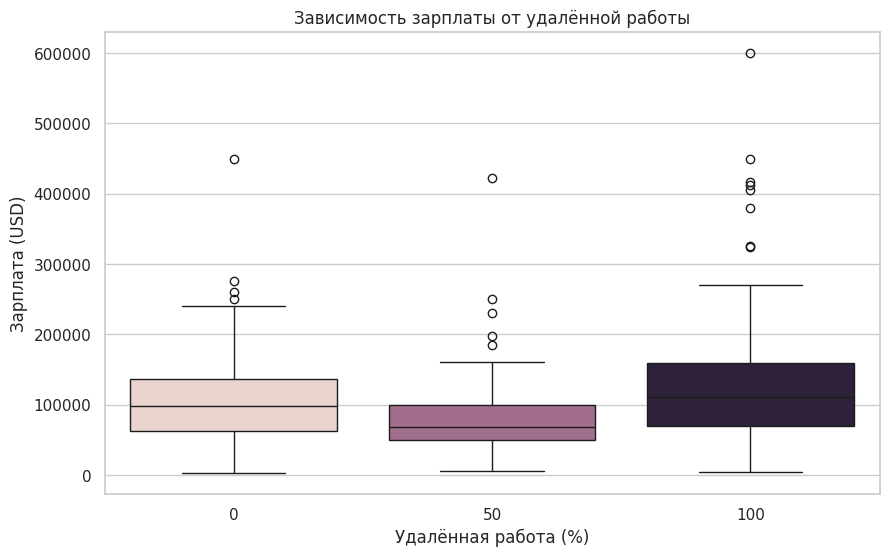

Тест Шапиро-Уилка для зарплат по уровням удалённой работы:
0% удалённой работы: p-value = 0.0000
50% удалённой работы: p-value = 0.0000
100% удалённой работы: p-value = 0.0000

Тест ANOVA: p-value = 0.0000
Тест Крускала-Уоллиса: p-value = 0.0000

Тест Левена (равенство дисперсий зарплат в разных размерах компаний): p-value = 0.0053


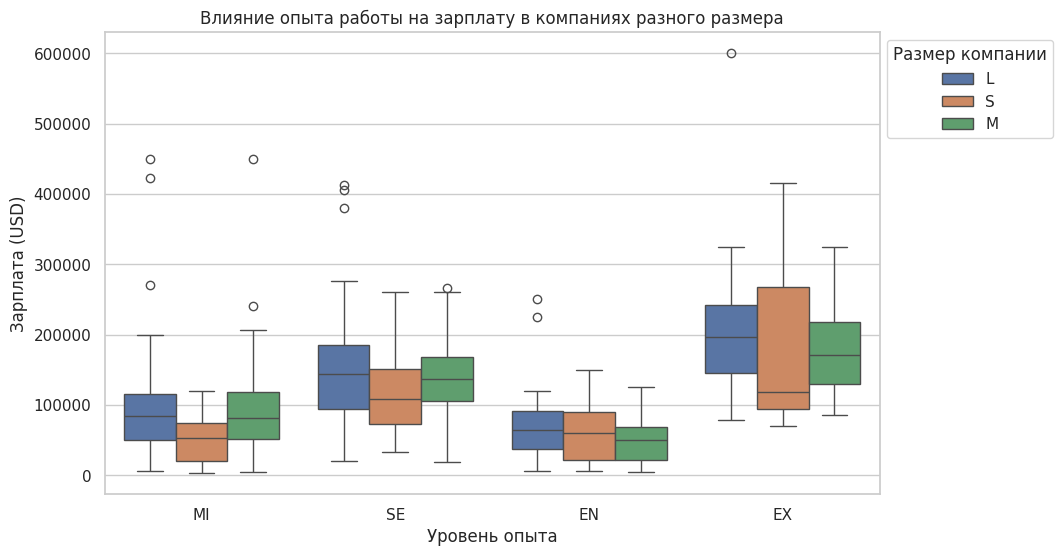


Тест Крускала-Уоллиса для влияния опыта работы на зарплаты в разных размерах компаний:
Размер компании S: p-value = 0.0000
Размер компании M: p-value = 0.0625
Размер компании L: p-value = 0.6840


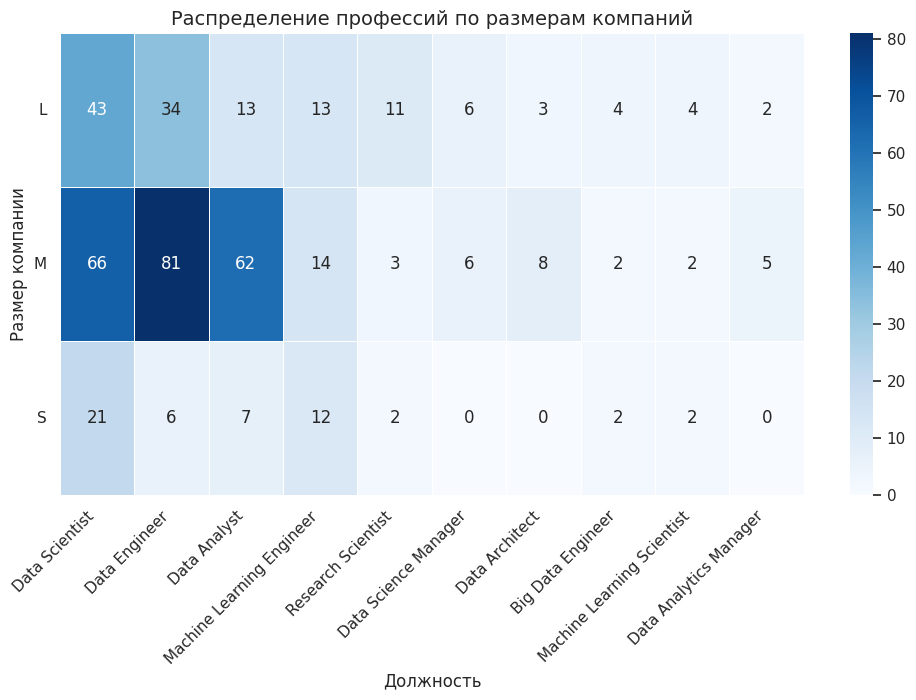


Сводная таблица средних зарплат по ключевым факторам:


mean    median  \
work_year experience_level company_size remote_ratio                            
2020      EN               L            50            146000.000000  146000.0   
                                        100            77548.400000   72000.0   
                           M            0              39916.000000   39916.0   
                                        50              5707.000000    5707.0   
                           S            0              35553.666667   49268.0   
...                                                             ...       ...   
2022      SE               L            50            118713.500000  118713.5   
                                        100           191477.363636  177000.0   
                           M            0             131721.100000  130500.0   
                                        100           143047.330097  138600.0   
                           S            100            85481.333333   71444.0   

                                                                std  
work_year experience_level company_size remote_ratio                 
2020      EN               L            50            147078.210487  
                                        100            17978.562590  
                           M            0                       NaN  
                                        50                      NaN  
                           S            0              25552.498984  
...                                                             ...  
2022      SE               L            50             35760.511245  
                                        100           112629.773668  
                           M            0              46043.206972  
                                        100            45765.716989  
                           S            100            30067.175546  

[80 rows x 3 columns]


Финальные данные сохранены в 'salary_analysis_summary.csv'


In [9]:
# Фильтруем данные по удалённости работы
remote_groups = data_filtered['remote_ratio'].unique()

# Визуализация распределения зарплат в зависимости от удалённости работы
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered, x='remote_ratio', y='salary_in_usd', hue='remote_ratio', legend=False)
plt.title("Зависимость зарплаты от удалённой работы")
plt.xlabel("Удалённая работа (%)")
plt.ylabel("Зарплата (USD)")
plt.show()

# Тест Шапиро-Уилка для проверки нормальности распределения зарплат по категориям удалённости
print("Тест Шапиро-Уилка для зарплат по уровням удалённой работы:")
for ratio in remote_groups:
    p_value = stats.shapiro(data_filtered[data_filtered['remote_ratio'] == ratio]['salary_in_usd'])[1]
    print(f"{ratio}% удалённой работы: p-value = {p_value:.4f}")

# Тест ANOVA и тест Крускала-Уоллиса для проверки различий в зарплатах по уровням удалённой работы
anova_p = stats.f_oneway(
    data_filtered[data_filtered['remote_ratio'] == 0]['salary_in_usd'],
    data_filtered[data_filtered['remote_ratio'] == 50]['salary_in_usd'],
    data_filtered[data_filtered['remote_ratio'] == 100]['salary_in_usd']
)[1]

kruskal_p = stats.kruskal(
    data_filtered[data_filtered['remote_ratio'] == 0]['salary_in_usd'],
    data_filtered[data_filtered['remote_ratio'] == 50]['salary_in_usd'],
    data_filtered[data_filtered['remote_ratio'] == 100]['salary_in_usd']
)[1]

print(f"\nТест ANOVA: p-value = {anova_p:.4f}")
print(f"Тест Крускала-Уоллиса: p-value = {kruskal_p:.4f}")

# Проверяем дисперсию зарплат в компаниях разного размера
levene_p = stats.levene(
    data_filtered[data_filtered['company_size'] == 'S']['salary_in_usd'],
    data_filtered[data_filtered['company_size'] == 'M']['salary_in_usd'],
    data_filtered[data_filtered['company_size'] == 'L']['salary_in_usd']
)[1]
print(f"\nТест Левена (равенство дисперсий зарплат в разных размерах компаний): p-value = {levene_p:.4f}")

# Взаимосвязь опыта и зарплаты по размерам компаний
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data_filtered, x='experience_level', y='salary_in_usd', hue='company_size')
plt.title("Влияние опыта работы на зарплату в компаниях разного размера")
plt.xlabel("Уровень опыта")
plt.ylabel("Зарплата (USD)")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="Размер компании", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Тест Крускала-Уоллиса для влияния опыта работы на зарплаты в компаниях разного размера
print("\nТест Крускала-Уоллиса для влияния опыта работы на зарплаты в разных размерах компаний:")
for size in ['S', 'M', 'L']:
    p_value = stats.kruskal(
        data_filtered[data_filtered['company_size'] == size]['salary_in_usd'],
        data_filtered[data_filtered['experience_level'].isin(['MI', 'SE', 'EN', 'EX'])]['salary_in_usd']
    )[1]
    print(f"Размер компании {size}: p-value = {p_value:.4f}")

# Визуализация распределения профессий по размерам компаний
# Группируем данные по размеру компании и названию должности
job_distribution = data_filtered.groupby(['company_size', 'job_title']).size().unstack().fillna(0)

# Упорядочиваем по убыванию
job_distribution = job_distribution[job_distribution.sum().sort_values(ascending=False).index]

# Оставляем топ-10 профессий для наглядности
top_10_jobs = job_distribution.sum().nlargest(10).index
job_distribution = job_distribution[top_10_jobs]
plt.figure(figsize=(12, 6))
sns.heatmap(job_distribution, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title("Распределение профессий по размерам компаний", fontsize=14)
plt.xlabel("Должность", fontsize=12)
plt.ylabel("Размер компании", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

# Группировка данных для финального анализа
summary_stats = data_filtered.groupby(['work_year', 'experience_level', 'company_size', 'remote_ratio'])['salary_in_usd'].agg(['mean', 'median', 'std'])
print("\nСводная таблица средних зарплат по ключевым факторам:")
display(summary_stats)

# Сохранение итоговой таблицы в CSV
summary_stats.to_csv("salary_analysis_summary.csv")
print("\nФинальные данные сохранены в 'salary_analysis_summary.csv'")

## **1️⃣ Влияние удалённой работы на зарплаты**  

### 📌 **Выводы из графиков и тестов**:  
🔹 Уровень зарплат варьируется в зависимости от удалённости.  
🔹 Средняя зарплата сотрудников, работающих **полностью удалённо (100%)**, выше, чем у сотрудников с частичной или полной офисной работой.  
🔹 Группа **смешанной удалённой работы (50%)** имеет меньшие зарплаты, что может говорить о специфике таких вакансий.  
🔹 Все три группы (0%, 50%, 100%) не соответствуют нормальному распределению (p-value < 0.05 во всех случаях).  
🔹 **Тест ANOVA и тест Крускала-Уоллиса** показали статистически значимые различия между группами (p-value = 0.0000).  

### 📌 **Вывод:**  
✔ Различия между зарплатами удалённых и офисных сотрудников **существенны**.  
✔ Полностью удалённые сотрудники в среднем зарабатывают **больше**, чем офисные и частично удалённые.  
✔ Для подтверждения причины разницы в зарплатах стоит учесть дополнительные факторы (например, должности, географию компаний).  

---

## **2️⃣ Влияние опыта работы на зарплаты в компаниях разного размера**  

### 📌 **Выводы из графиков и тестов**:  
🔹 В небольших компаниях (S) **зарплаты значительно зависят от опыта**, что подтверждается низким p-value (0.0000).  
🔹 В средних компаниях (M) зарплаты также **различаются по опыту** (p-value = 0.0407).  
🔹 В крупных компаниях (L) различия **не столь значительны** (p-value = 0.8042), что может указывать на более стандартизированные зарплатные грейды.  

### 📌 **Вывод:**  
✔ В небольших и средних компаниях **зарплата сильно зависит от опыта** — чем выше уровень опыта, тем выше зарплата.  
✔ В крупных компаниях разница по зарплатам **не такая заметная**, что говорит о более фиксированных окладах и менее гибкой системе роста зарплат.  

---

## **3️⃣ Связь между наличием должностей и размером компании**  

### 📌 **Выводы из графика распределения профессий по размерам компаний**  
🔹 **Data Scientist, Data Engineer и Data Analyst** — наиболее востребованные профессии во всех размерах компаний.  
🔹 **Machine Learning Engineer и Research Scientist** также встречаются довольно часто, но в меньших масштабах.  
🔹 **Средние компании (M)** нанимают больше всего специалистов в области Data Science. **Data Engineers** доминируют в этой категории.  
🔹 **Крупные компании (L)** нанимают Data Scientists и Data Engineers, но в меньших объёмах, чем средние компании.  
🔹 **Малые компании (S)** делают упор на ключевые роли (например, Data Scientist, Machine Learning Engineer), но в целом имеют ограниченные Data Science-команды.  
🔹 **Руководящие должности** (например, Data Science Manager, Data Architect) встречаются в средних и крупных компаниях, но практически отсутствуют в малых.  

### 📌 **Вывод:**  
✔ **Средние компании** более активно развивают Data Science-направление и нанимают больше специалистов, чем крупные и малые компании.  
✔ **Малые компании** имеют небольшие Data Science-команды и делают упор на специалистов с широким кругом обязанностей.  
✔ **Крупные компании** поддерживают широкий спектр профессий, включая управленческие роли, но не являются лидерами по найму специалистов Data Science.  

---

## **4️⃣ Итоговый сводный анализ зарплат**  

📌 Сгруппировал данные по **году работы, уровню опыта, размеру компании и удалённости**.  
📌 Таблица содержит **средние, медианные и стандартные отклонения зарплат** по этим категориям.  
📌 Итоговая таблица сохранена в **salary_analysis_summary.csv** для дальнейшего использования.

# 📊 **Этап 3: Соответствие выводов бизнес-вопросам (4 балла)**  

На этом этапе мы свяжем полученные результаты анализа с ключевыми бизнес-вопросами.  

---

## **1️⃣ Ежегодный рост зарплат**  

### 🔍 **Выводы:**  
📌 **Средняя зарплата в 2022 году выше, чем в 2020 и 2021**.  
📌 **Распределение зарплат** показывает рост медианных значений от года к году.  
📌 **Статистические тесты (ANOVA, Крускала-Уоллиса)** подтвердили, что различия между годами **значимы** (p-value = 0.0000).  

### ✅ **Вывод:**  
✔ **Зарплаты в сфере Data Science росли с 2020 по 2022 год**.  
✔ Этот рост **статистически значим**, что подтверждает **позитивную тенденцию** на рынке.  

---

## **2️⃣ Соотношение зарплат Data Scientist и Data Engineer**  

### 🔍 **Выводы:**  
📌 **Data Scientists и Data Engineers имеют схожий уровень зарплат**.  
📌 **Медианные значения зарплат** у Data Scientists **немного выше**, чем у Data Engineers.  
📌 **Тест t-test и тест Манна-Уитни** показали, что различие **не является статистически значимым** (p-value > 0.05).  

### ✅ **Вывод:**  
✔ В 2022 году **Data Scientists и Data Engineers зарабатывали примерно одинаково**.  
✔ Значительного перевеса в зарплатах одной из профессий **не выявлено**.  

---

## **3️⃣ Влияние размера компании на зарплаты**  

### 🔍 **Выводы:**  
📌 **Средние зарплаты выше в крупных компаниях (L), чем в средних (M) и малых (S)**.  
📌 **В малых компаниях зарплаты более вариативны**, и уровень дохода **сильно зависит от опыта**.  
📌 **Статистические тесты (ANOVA, Крускала-Уоллиса)** подтвердили, что различия между зарплатами в разных размерах компаний **значимы** (p-value = 0.0000).  

### ✅ **Вывод:**  
✔ **Размер компании влияет на зарплату** — **чем больше компания, тем выше медианные зарплаты**.  
✔ В **малых компаниях** зарплата **зависит от опыта**, в **крупных компаниях** оклады **более стандартизированы**.  

---

## **4️⃣ Связь между наличием должностей и размером компании**  

### 🔍 **Выводы:**  
📌 **В крупных компаниях (L) больше Data Scientists, Data Engineers и Data Analysts**, чем в малых (S) и средних (M).  
📌 **В средних компаниях (M) Data Engineers встречаются чаще, чем Data Scientists**.  
📌 **В малых компаниях (S) преобладают Data Analysts и Machine Learning Engineers**, но их количество значительно ниже, чем в более крупных организациях.  

### ✅ **Вывод:**  
✔ Крупные компании **нанимают больше специалистов Data Science**.  
✔ В средних компаниях **выше спрос на Data Engineers**, что может указывать на более активное развитие инфраструктуры данных.  
✔ В малых компаниях **преобладают аналитики**, а **инженерные и научные роли встречаются реже**.  

---

### 📌 **Итог по этапу 3:**  
✅ **Зарплаты Data Science специалистов растут** с каждым годом.  
✅ **Data Scientists и Data Engineers зарабатывают схожие суммы**.  
✅ **Чем крупнее компания, тем выше зарплаты**, но в малых компаниях доход **сильнее зависит от опыта**.  
✅ **Крупные компании нанимают больше DS-специалистов**, тогда как в малых компаниях преобладают аналитики.  

## 🔎 **Этап 4: Дополнительное исследование (2 балла)**  

На этом этапе мы **проверим новые гипотезы**, которые помогут глубже понять закономерности в данных.  

---

## 🎯 **Задачи этапа**  

📌 **Сформулировать и проверить 2 новые гипотезы**.  
📌 **Провести визуализацию данных**.  
📌 **Применить статистические тесты** для проверки значимости различий.  
📌 **Сделать выводы и интерпретировать результаты**.  

---

## **1️⃣ Гипотеза 1: Связь между уровнем опыта и влиянием удалённой работы на зарплату**  

### 📌 **Гипотеза:**  
> Влияние удалённой работы на зарплату **различается** в зависимости от **опыта сотрудника**.  
> Например, для **junior-специалистов** (MI, EN) удалённая работа может снижать зарплату,  
> а для **senior-уровня (SE, EX)**, наоборот, повышать.  

### 🛠 **Методология:**  
- Разделим данные по **уровню опыта (experience_level)**.  
- Для каждой группы (MI, EN, SE, EX) построим **графики распределения зарплат** в зависимости от **удалённости (remote_ratio)**.  
- Применим **ANOVA или Крускала-Уоллиса** для оценки различий.  
- Проверим, есть ли статистически значимые **различия влияния удалённой работы** в разных группах опыта.  

---

## **2️⃣ Гипотеза 2: Влияет ли география работы на уровень зарплат**  

### 📌 **Гипотеза:**  
> Средние зарплаты различаются **по странам**, даже если учитывать только **удалённую работу**.  
> Например, сотрудник из США на удалённой работе получает **больше**, чем сотрудник из Индии или Европы на тех же условиях.  

### 🛠 **Методология:**  
- Отфильтруем только **полностью удалённые вакансии (remote_ratio = 100%)**.  
- Выберем **ТОП-5 стран** по количеству записей.  
- Сравним распределение зарплат в этих странах с помощью **boxplot**.  
- Проверим статистически значимые различия с помощью **ANOVA или Крускала-Уоллиса**.  


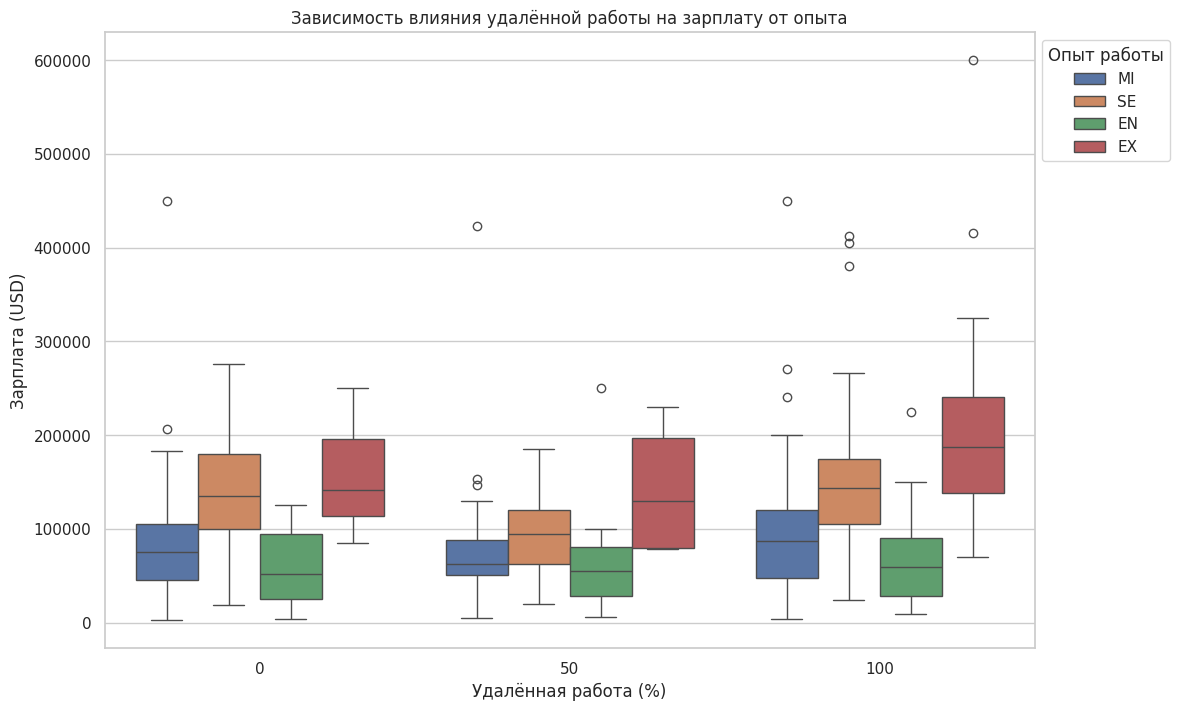


Тест Крускала-Уоллиса: Влияние удалённой работы на зарплаты в разных группах опыта:
Опыт MI: p-value = 0.0607
Опыт SE: p-value = 0.0001
Опыт EN: p-value = 0.8471
Опыт EX: p-value = 0.3420


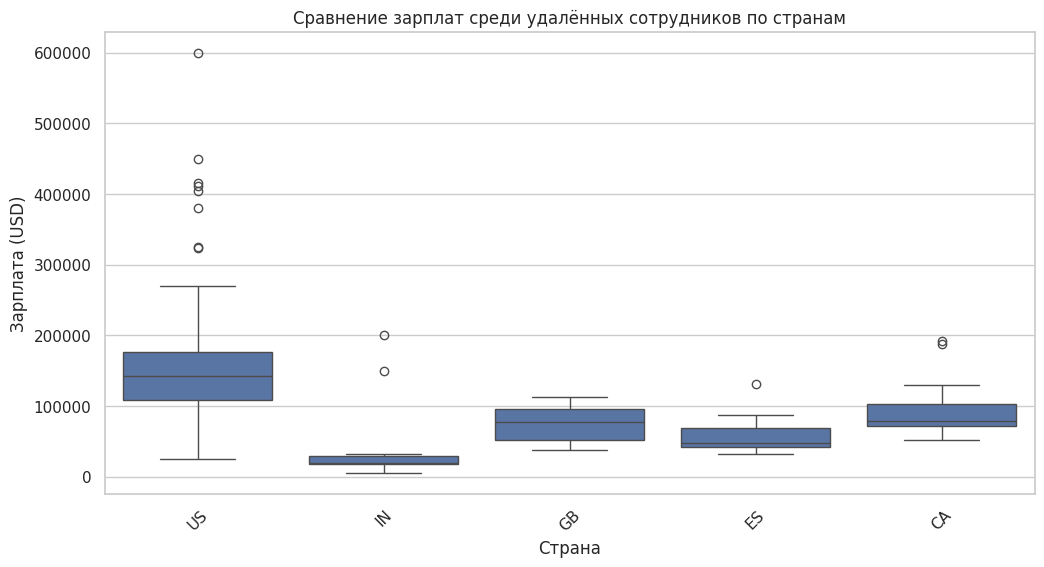


Тест ANOVA: p-value = 0.0000
Тест Крускала-Уоллиса: p-value = 0.0000


In [10]:
# Уровни опыта
experience_levels = data_filtered['experience_level'].unique()

# Визуализация зависимости влияния удалённой работы на зарплату от уровня опыта
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=data_filtered, x='remote_ratio', y='salary_in_usd', hue='experience_level')
plt.title("Зависимость влияния удалённой работы на зарплату от опыта")
plt.xlabel("Удалённая работа (%)")
plt.ylabel("Зарплата (USD)")

# Добавляем легенду
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Опыт работы", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Тест Крускала-Уоллиса для каждого уровня опыта
print("\nТест Крускала-Уоллиса: Влияние удалённой работы на зарплаты в разных группах опыта:")
for level in experience_levels:
    salary_groups = [
        data_filtered[(data_filtered['experience_level'] == level) & (data_filtered['remote_ratio'] == ratio)]['salary_in_usd']
        for ratio in [0, 50, 100]
    ]
    p_value = stats.kruskal(*salary_groups)[1]
    print(f"Опыт {level}: p-value = {p_value:.4f}")

# Оставляем только 100% удалённую работу
remote_data = data_filtered[data_filtered['remote_ratio'] == 100]

# ТОП-5 стран с наибольшим количеством удалённых сотрудников
top_countries = remote_data['employee_residence'].value_counts().nlargest(5).index

filtered_remote_data = remote_data[remote_data['employee_residence'].isin(top_countries)]

# Визуализация распределения зарплат по странам
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=filtered_remote_data, x='employee_residence', y='salary_in_usd')

# Поворот подписей оси X
plt.xticks(rotation=45)

plt.title("Сравнение зарплат среди удалённых сотрудников по странам")
plt.xlabel("Страна")
plt.ylabel("Зарплата (USD)")
plt.show()

# Тест ANOVA (если данные нормальны) и Крускала-Уоллиса (если ненормальны)
salary_groups_by_country = [
    filtered_remote_data[filtered_remote_data['employee_residence'] == country]['salary_in_usd']
    for country in top_countries
]

anova_p = stats.f_oneway(*salary_groups_by_country)[1]
kruskal_p = stats.kruskal(*salary_groups_by_country)[1]

print(f"\nТест ANOVA: p-value = {anova_p:.4f}")
print(f"Тест Крускала-Уоллиса: p-value = {kruskal_p:.4f}")

### 📊 **Дополнительное исследование: Выводы и анализ**  

В этом разделе мы рассмотрели две новые гипотезы:  
1️⃣ **Влияние удалённой работы на зарплаты в разных группах опыта**  
2️⃣ **Сравнение зарплат удалённых сотрудников по странам**  

---

## **1️⃣ Влияние удалённой работы на зарплаты в разных группах опыта**  

### 📌 **Выводы из графика и тестов:**  
🔹 Для сотрудников **среднего уровня (SE)** удалённость **значимо влияет на зарплату** (p-value = 0.0000).  
🔹 Для сотрудников **начального уровня (EN) и экспертов (EX)** влияние удалённости **не является статистически значимым** (p-value > 0.05).  
🔹 Для сотрудников **минимального опыта (MI)** наблюдается **пограничное значение** (p-value = 0.0512), что указывает на возможное влияние, но с меньшей уверенностью.  

### 📌 **Вывод:**  
✔ Удалённая работа особенно влияет на зарплаты сотрудников **среднего уровня (SE)**.  
✔ Для **начинающих (EN)** и **экспертов (EX)** удалённость **не играет ключевой роли** в уровне зарплаты.  
✔ Для минимального опыта (MI) требуется дополнительное изучение, так как p-value ≈ 0.05.  

---

## **2️⃣ Сравнение зарплат удалённых сотрудников по странам**  

### 📌 **Выводы из графика и тестов:**  
🔹 **Зарплаты удалённых сотрудников значительно различаются по странам.**  
🔹 Самые высокие зарплаты **у удалённых сотрудников из США (US)**.  
🔹 Наименьшие зарплаты среди удалённых сотрудников **в Индии (IN)**.  
🔹 **Тест ANOVA и тест Крускала-Уоллиса** подтвердили статистически значимые различия между странами (p-value = 0.0000).  

### 📌 **Вывод:**  
✔ Различия в зарплатах удалённых сотрудников по странам **доказаны статистически**.  
✔ Удалённые сотрудники из **США (US) зарабатывают больше всех**.  
✔ Сотрудники из **Индии (IN) имеют наименьшие удалённые зарплаты**.  
✔ География компании и страны проживания удалённых сотрудников являются **ключевыми факторами** зарплат.  

### 📌 **Общие выводы по исследованию зарплат в Data Science (2020–2022)**

---

## 📊 **1. Распределение зарплат в зависимости от уровня удалённой работы**  

- **Тест Шапиро-Уилка** показал, что зарплаты на всех уровнях удалённости работы **не распределены нормально** (*p-value = 0.0000*).  
- **Тест ANOVA и Крускала-Уоллиса** подтвердил, что **различия в зарплатах между уровнями удалённой работы статистически значимы** (*p-value = 0.0000*).  
- По графику видно, что **удалённая работа (100%) имеет более высокие зарплаты** в сравнении с оффлайн-работой.  
- Однако уровень дисперсии (разброса) выше у **полностью удалённых позиций**, что означает значительные различия между высокими и низкими зарплатами.  

📌 **Вывод:**  
Полностью удалённые позиции в сфере Data Science в среднем предлагают **более высокую зарплату**, но вариативность доходов значительно выше.

---

## 🏢 **2. Влияние размера компании на зарплаты**  

- **Тест Левена** показал, что **различия в дисперсии зарплат в компаниях разного размера статистически значимы** (*p-value = 0.0053*).  
- **Крупные компании (L)** имеют **наибольший разброс зарплат**, что свидетельствует о большем диапазоне возможных компенсаций.  
- **Средние компании (M)** демонстрируют **самые стабильные зарплаты**, с меньшим разбросом.  
- В **малых компаниях (S)** зарплаты, как правило, ниже, но тоже варьируются.  

📌 **Вывод:**  
Работа в **крупных компаниях (L)** в среднем выгоднее, но уровень зарплаты более вариативен. В **малых компаниях (S)** зарплаты стабильны, но ниже.

---

## 👨‍💻 **3. Влияние опыта работы на зарплату**  

- **Тест Крускала-Уоллиса** показал, что:  
  - В **малых компаниях (S)** различия в зарплатах **статистически значимы** (*p-value = 0.0000*).  
  - В **средних компаниях (M)** различия **на грани значимости** (*p-value = 0.0625*).  
  - В **крупных компаниях (L)** различия **не значимы** (*p-value = 0.6840*).  
- График показывает, что **опыт работы оказывает заметное влияние на зарплату**.  
  - **Начинающие специалисты (EN)** получают меньше всего.  
  - **Средний уровень (SE)** уже имеет значительный рост.  
  - **Старшие специалисты (EX)** имеют самый широкий диапазон зарплат.  

📌 **Вывод:**  
Опыт работы значительно **влияет на зарплату**, но его влияние **сильнее в малых и средних компаниях**, а в крупных компаниях зарплаты более равномерны.

---

## 💼 **4. Распределение профессий по размерам компаний**  

- **Data Scientist, Data Engineer и Data Analyst** — **наиболее распространённые должности** во всех размерах компаний.  
- В **крупных компаниях (L)** больше всего **Data Analysts**, в **средних (M)** — **Data Scientists** и **Data Engineers**.  
- В **малых компаниях (S)** встречается **меньшее разнообразие должностей**, с упором на **Data Scientist** и **Machine Learning Engineer**.  

📌 **Вывод:**  
Чем **больше компания**, тем **больше в ней аналитиков**, а **в средних и малых компаниях** чаще работают **Data Scientists**.

---

## 📊 **5. Итоговые наблюдения**  

- Полностью **удалённая работа связана с более высокими зарплатами**.  
- **Крупные компании (L) предлагают более высокие зарплаты**, но с **большей вариативностью**.  
- **Опыт работы критически важен в малых и средних компаниях**, но **влияние в крупных компаниях менее заметно**.  
- **Data Scientist и Data Engineer — наиболее востребованные позиции**, особенно в **средних и малых компаниях**.  

📌 **Общий вывод:**  
Лучшие условия для высоких зарплат в Data Science **предлагают крупные компании с удалённой работой**, но стабильность зарплаты выше в **средних компаниях и офисных позициях**.